###  Import lib

In [1]:
import pandas as pd
import numpy as np
import math
from functools import reduce 
import operator
from itertools import permutations, combinations, chain
# from functools import reduce 
import seaborn as sb
import matplotlib.pyplot as plt


- Load dataset

In [47]:
columns = [ f'item {i+1}' for i in range(32) ]

df_trans = pd.read_csv('groceriesList.csv', header= None, names= columns)

- Display the haed of dataset

In [48]:
df_trans.head()

,item 1,item 2,item 3,item 4,item 5,item 6,item 7,item 8,item 9,item 10,...,item 23,item 24,item 25,item 26,item 27,item 28,item 29,item 30,item 31,item 32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Tail of dataset

In [49]:
df_trans.tail()

,item 1,item 2,item 3,item 4,item 5,item 6,item 7,item 8,item 9,item 10,...,item 23,item 24,item 25,item 26,item 27,item 28,item 29,item 30,item 31,item 32
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9834,chicken,tropical fruit,other vegetables,vinegar,shopping bags,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Discribe of dataset

In [50]:
df_trans.describe().T

,count,unique,top,freq
item 1,9835,158,sausage,825
item 2,7676,151,whole milk,654
item 3,6033,155,whole milk,506
item 4,4734,153,whole milk,315
item 5,3729,150,rolls/buns,176
item 6,2874,137,soda,150
item 7,2229,138,soda,120
item 8,1684,140,shopping bags,76
item 9,1246,128,soda,61
item 10,896,120,shopping bags,49


- Shape of dataset   (Number of rows , Number of columns)

In [51]:
df_trans.shape

(9835, 32)

- disply the name of columns for dataset

In [52]:
df_trans.columns

Index(['item 1', 'item 2', 'item 3', 'item 4', 'item 5', 'item 6', 'item 7',
       'item 8', 'item 9', 'item 10', 'item 11', 'item 12', 'item 13',
       'item 14', 'item 15', 'item 16', 'item 17', 'item 18', 'item 19',
       'item 20', 'item 21', 'item 22', 'item 23', 'item 24', 'item 25',
       'item 26', 'item 27', 'item 28', 'item 29', 'item 30', 'item 31',
       'item 32'],
      dtype='object')

In [53]:
df_trans.dtypes

item 1     object
item 2     object
item 3     object
item 4     object
item 5     object
item 6     object
item 7     object
item 8     object
item 9     object
item 10    object
item 11    object
item 12    object
item 13    object
item 14    object
item 15    object
item 16    object
item 17    object
item 18    object
item 19    object
item 20    object
item 21    object
item 22    object
item 23    object
item 24    object
item 25    object
item 26    object
item 27    object
item 28    object
item 29    object
item 30    object
item 31    object
item 32    object
dtype: object

-  check duplicate rows

In [54]:
duplicate_rows = df_trans[df_trans.duplicated()]
duplicate_rows.shape[0]

2824

- Rename 

In [55]:
df_trans.index.rename('TID', inplace=True)

-  show dataset

In [56]:
df_trans.head(5)

,item 1,item 2,item 3,item 4,item 5,item 6,item 7,item 8,item 9,item 10,...,item 23,item 24,item 25,item 26,item 27,item 28,item 29,item 30,item 31,item 32
TID,,,,,,,,,,,,,,,,,,,,,
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-  disply number of citrus fruit in data set

In [57]:
df_trans['item 1'].value_counts()

sausage             825
whole milk          717
frankfurter         580
tropical fruit      482
other vegetables    460
                   ... 
organic products      1
cocoa drinks          1
flower (seeds)        1
kitchen towels        1
cake bar              1
Name: item 1, Length: 158, dtype: int64

<AxesSubplot:>

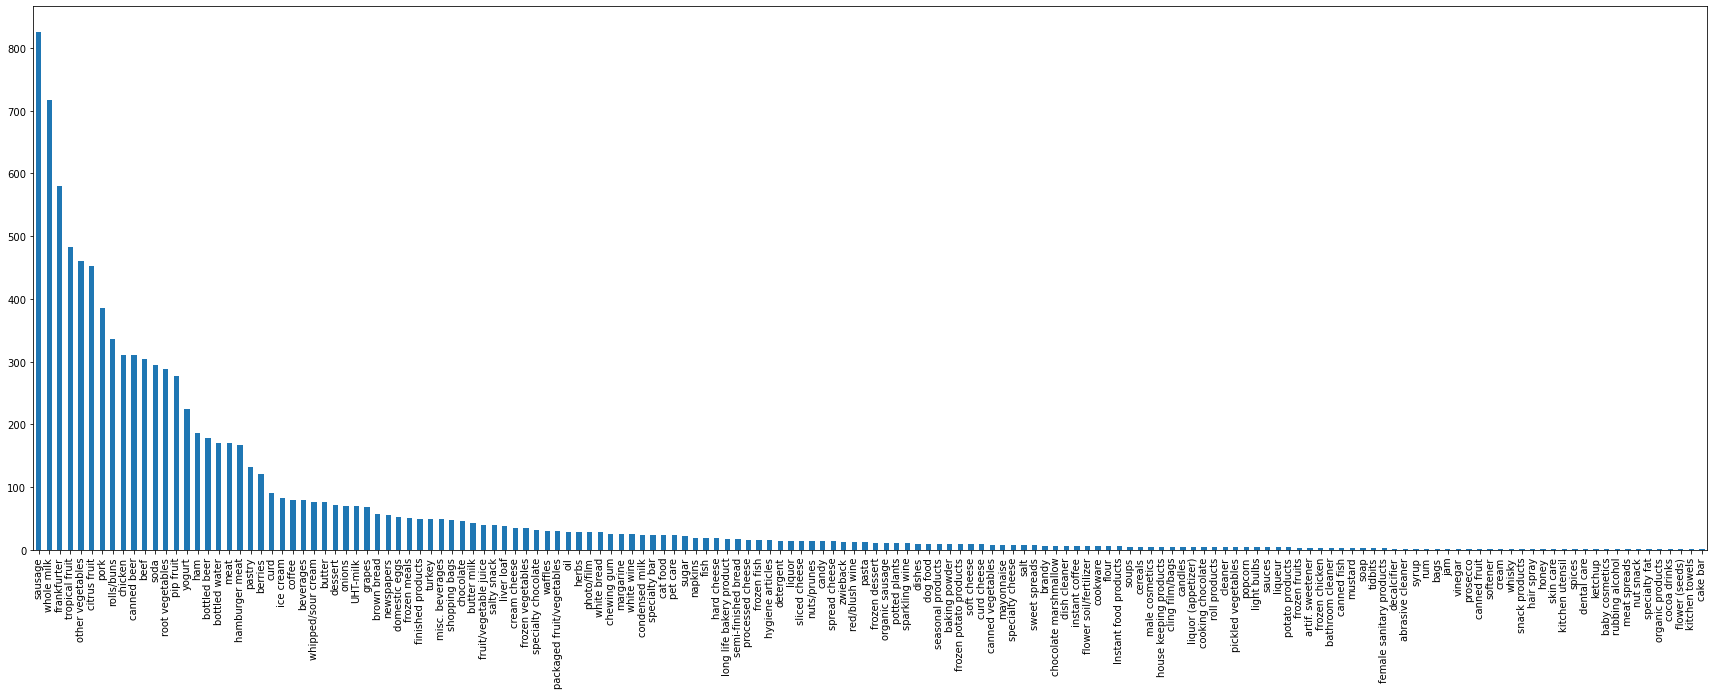

In [58]:
plt.figure(figsize=(30, 10))
df_trans['item 1'].value_counts().plot(kind='bar')

-  Display number of semi-finished bread in dataset

In [59]:
df_trans['item 2'].value_counts()

whole milk              654
other vegetables        550
root vegetables         383
rolls/buns              378
tropical fruit          355
                       ... 
abrasive cleaner          1
kitchen towels            1
specialty vegetables      1
decalcifier               1
hair spray                1
Name: item 2, Length: 151, dtype: int64

<AxesSubplot:>

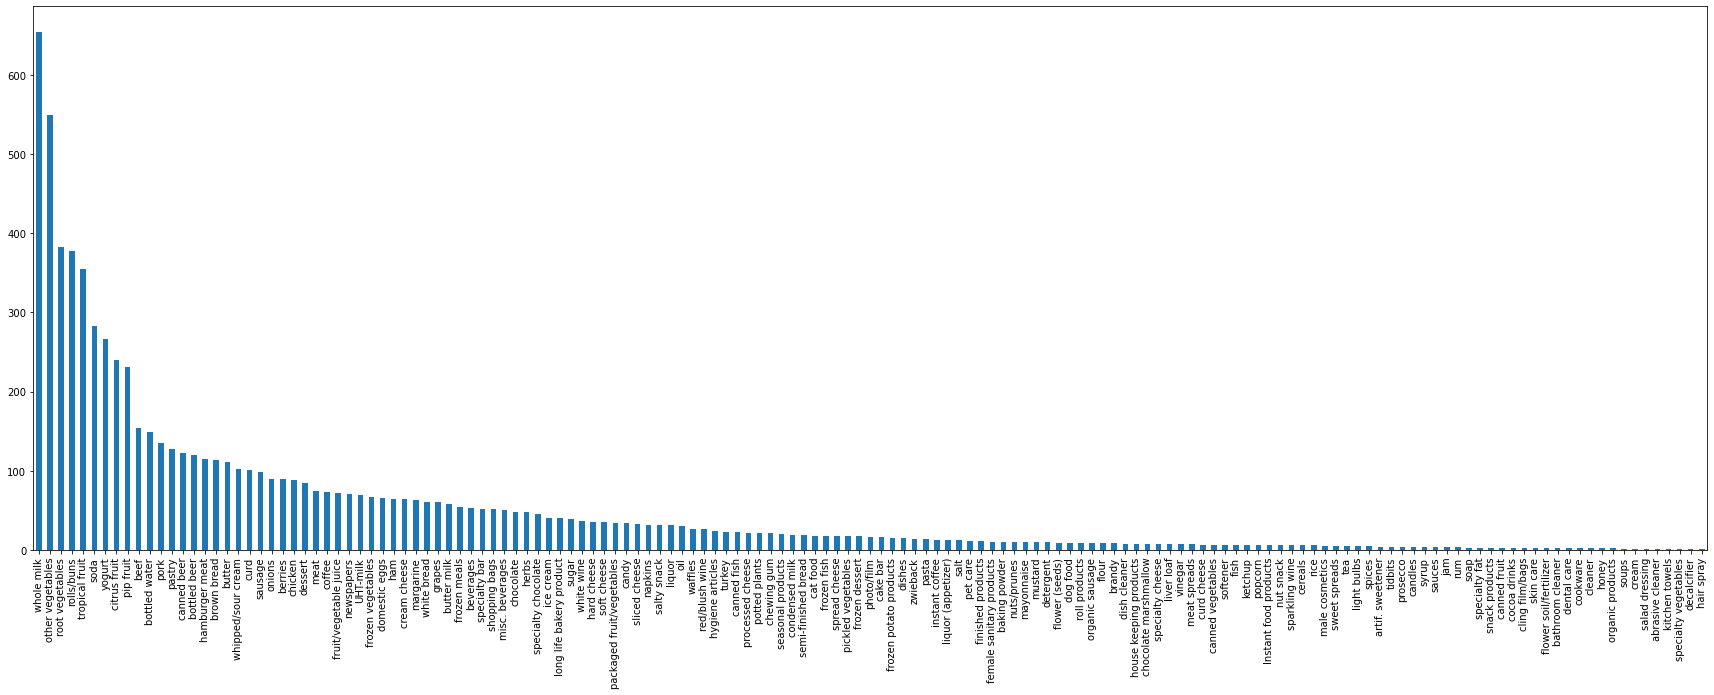

In [60]:
plt.figure(figsize=(30, 10))
df_trans['item 2'].value_counts().plot(kind='bar')


- Display number of margarine in dataset

In [63]:
df_trans['item 3'].value_counts()

whole milk          506
other vegetables    415
rolls/buns          293
yogurt              289
soda                229
                   ... 
artif. sweetener      1
decalcifier           1
bathroom cleaner      1
skin care             1
abrasive cleaner      1
Name: item 3, Length: 155, dtype: int64

<AxesSubplot:>

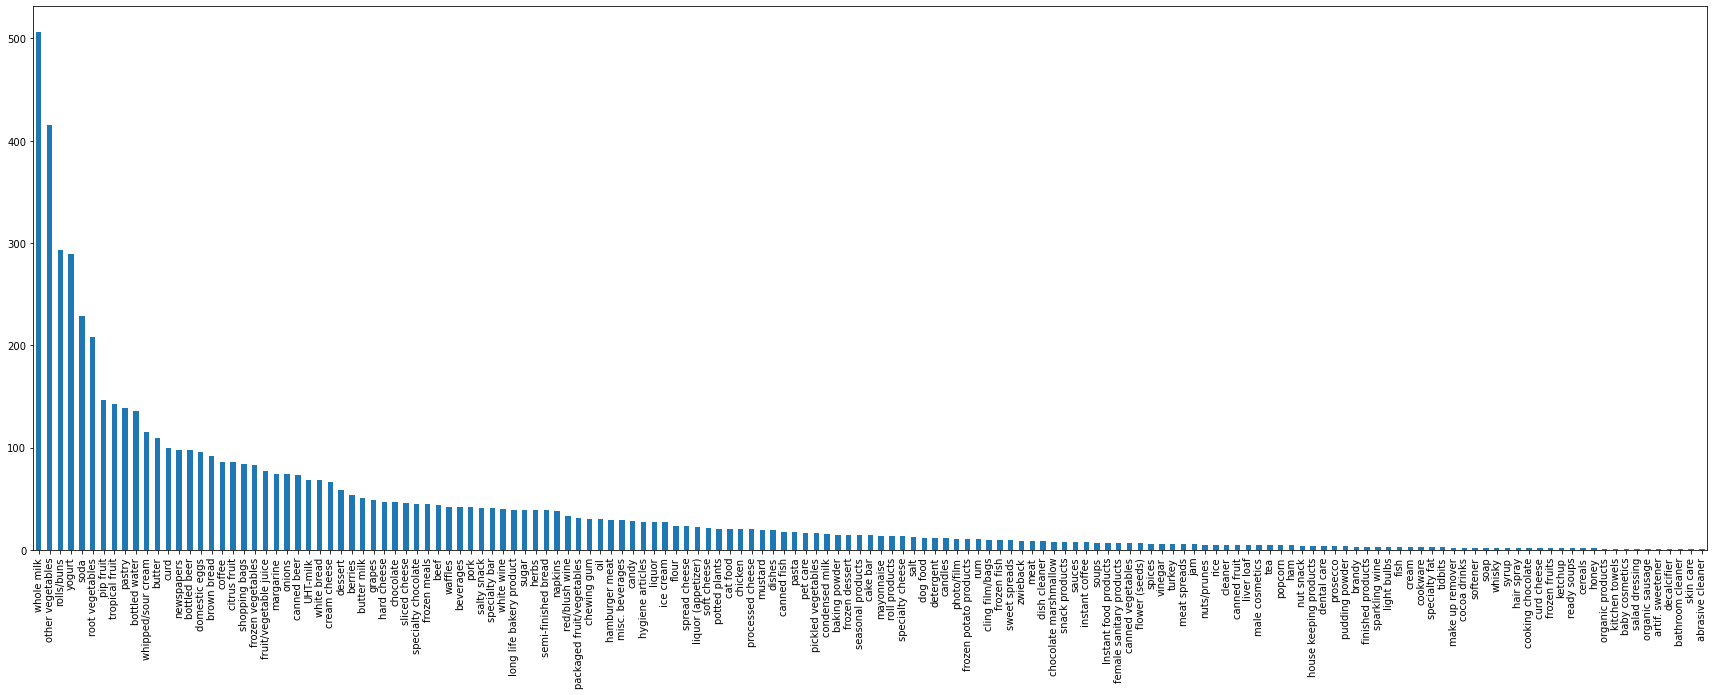

In [64]:
plt.figure(figsize=(30, 10))
df_trans['item 3'].value_counts().plot(kind='bar')


- Display number of ready soups in the dataset

In [65]:
df_trans['item 4'].value_counts()

whole milk                  315
other vegetables            254
rolls/buns                  238
soda                        211
yogurt                      202
                           ... 
female sanitary products      1
ready soups                   1
ham                           1
organic products              1
toilet cleaner                1
Name: item 4, Length: 153, dtype: int64

<AxesSubplot:>

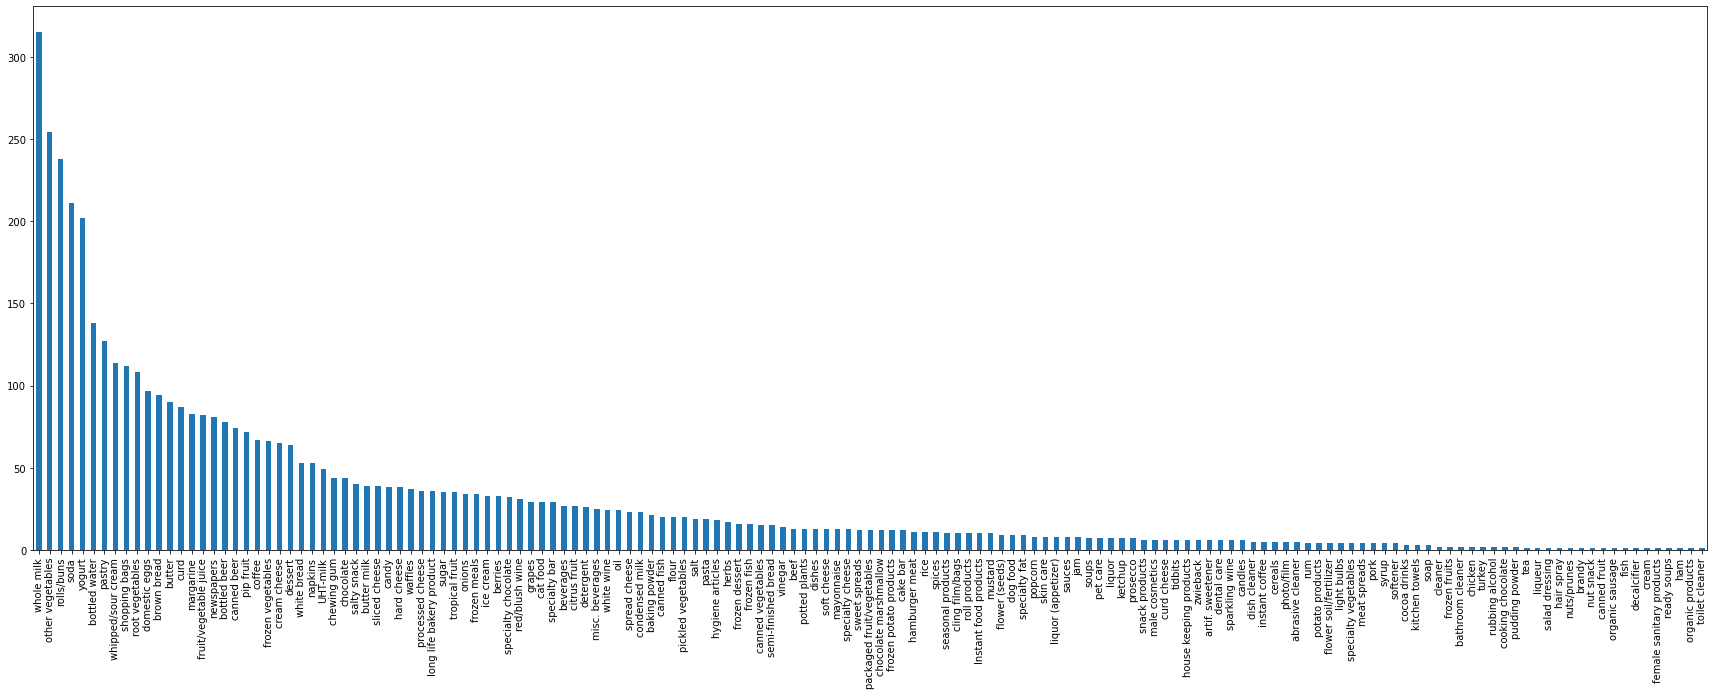

In [66]:
plt.figure(figsize=(30, 10))
df_trans['item 4'].value_counts().plot(kind='bar')

In [258]:
import itertools

class Apriori:

    frequencies: pd.Series
    supportCount: int

    def __init__(self, supportCount= 1):
        self.supportCount = supportCount

    
    def fit(self, df):

        # A series of transactions, where each 
        # transaction is represented as the set 
        # of items bought in that transaction
        transactions = pd.Series(
            frozenset(row) - {0}
            for id, row in df.fillna(0).iterrows()
        )

        # set of all unique items in transactions
        items = {
            item
            for itemSet in transactions
            for item    in itemSet
        }

        t = []
        k = 1
        while items:

            # Creating all the size-k subsets of items
            itemSets = {
                frozenset(itemSet)
                for itemSet in itertools.combinations(items, k)
            }

            # creating a table of item-subsets
            # and their frequency/support
            C = pd.Series({
                itemSet: sum( itemSet.issubset(transaction) for transaction in transactions )   # slower
                # itemSet: transactions.apply( itemSet.issubset ).sum()                           # faster
                for itemSet in itemSets
            })

            # pruning the table according to support count
            L = C[C > self.supportCount]
            
            # the set of all unique items in the current 
            # table. this will be used to create all 
            # size-k+1 subsets in next iteration
            items = {
                item
                for itemSet in L.keys()
                for item    in itemSet
            }
            
            # adding the frequency/support table of 
            # size-k subsets in a temporary list
            t.append(L)
            k += 1

        # concatenating all the frequeny/support 
        # tables into a single table
        self.frequencies = pd.concat(t)

        self.rules = [
            (subset, itemSet - subset)
            
            for itemSet in t[-2].keys()
            for k       in range(1, len(itemSet))
            for subset  in {
                frozenset(subset)
                for subset in combinations(itemSet, k)
            }
        ]

        return self

    def support(self, itemSet: set):
        # converting set to frozenset 
        # pd.Series only support frozensets
        itemSet = frozenset(itemSet)    

        # return the frequency of the itemSet, 
        # return 0 if itemSet is not present
        return self.frequencies.get(itemSet, 0)   

    def confidence(self, a: set, b: set):
        return self.support(a) / self.support(b)

    def lift(self, a: set, b: set):
        return self.support(a | b) / (self.support(a) * self.support(b))



In [259]:
apriori = Apriori(supportCount= 100)
apriori.fit(df_trans)

apriori.rules

[(frozenset({'whole milk'}), frozenset({'rolls/buns', 'yogurt'})),
 (frozenset({'rolls/buns'}), frozenset({'whole milk', 'yogurt'})),
 (frozenset({'yogurt'}), frozenset({'rolls/buns', 'whole milk'})),
 (frozenset({'whole milk', 'yogurt'}), frozenset({'rolls/buns'})),
 (frozenset({'rolls/buns', 'whole milk'}), frozenset({'yogurt'})),
 (frozenset({'rolls/buns', 'yogurt'}), frozenset({'whole milk'})),
 (frozenset({'whole milk'}), frozenset({'rolls/buns', 'root vegetables'})),
 (frozenset({'rolls/buns'}), frozenset({'root vegetables', 'whole milk'})),
 (frozenset({'root vegetables'}), frozenset({'rolls/buns', 'whole milk'})),
 (frozenset({'rolls/buns', 'whole milk'}), frozenset({'root vegetables'})),
 (frozenset({'rolls/buns', 'root vegetables'}), frozenset({'whole milk'})),
 (frozenset({'root vegetables', 'whole milk'}), frozenset({'rolls/buns'})),
 (frozenset({'whipped/sour cream'}),
  frozenset({'other vegetables', 'whole milk'})),
 (frozenset({'whole milk'}),
  frozenset({'other vegeta

In [257]:
apriori.support({'whole milk'})

2513

In [255]:
apriori.confidence({'whole milk'}, {'rolls/buns', 'tropical fruit'})

10.384297520661157

In [256]:
apriori.lift({'whole milk'}, {'rolls/buns', 'tropical fruit'})

0.0001775889342361867